In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("thyroid_cancer_risk_data.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [9]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [11]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [13]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [15]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categories = {col: df[col].unique().tolist() for col in categorical_columns}

print(categories)

{'Gender': ['Male', 'Female'], 'Country': ['Russia', 'Germany', 'Nigeria', 'India', 'UK', 'South Korea', 'Brazil', 'China', 'Japan', 'USA'], 'Ethnicity': ['Caucasian', 'Hispanic', 'Asian', 'African', 'Middle Eastern'], 'Family_History': ['No', 'Yes'], 'Radiation_Exposure': ['Yes', 'No'], 'Iodine_Deficiency': ['No', 'Yes'], 'Smoking': ['No', 'Yes'], 'Obesity': ['No', 'Yes'], 'Diabetes': ['No', 'Yes'], 'Thyroid_Cancer_Risk': ['Low', 'Medium', 'High'], 'Diagnosis': ['Benign', 'Malignant']}


In [17]:
# Separate features and target
X = df.drop(columns=['Diagnosis'])  # Replace 'Diagnosis' with your target column if it's different
y = df['Diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X and y for EDA on training set
train_df = pd.concat([X_train, y_train], axis=1)

In [19]:
# Check the shape of the splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (170152, 16), Test set: (42539, 16)


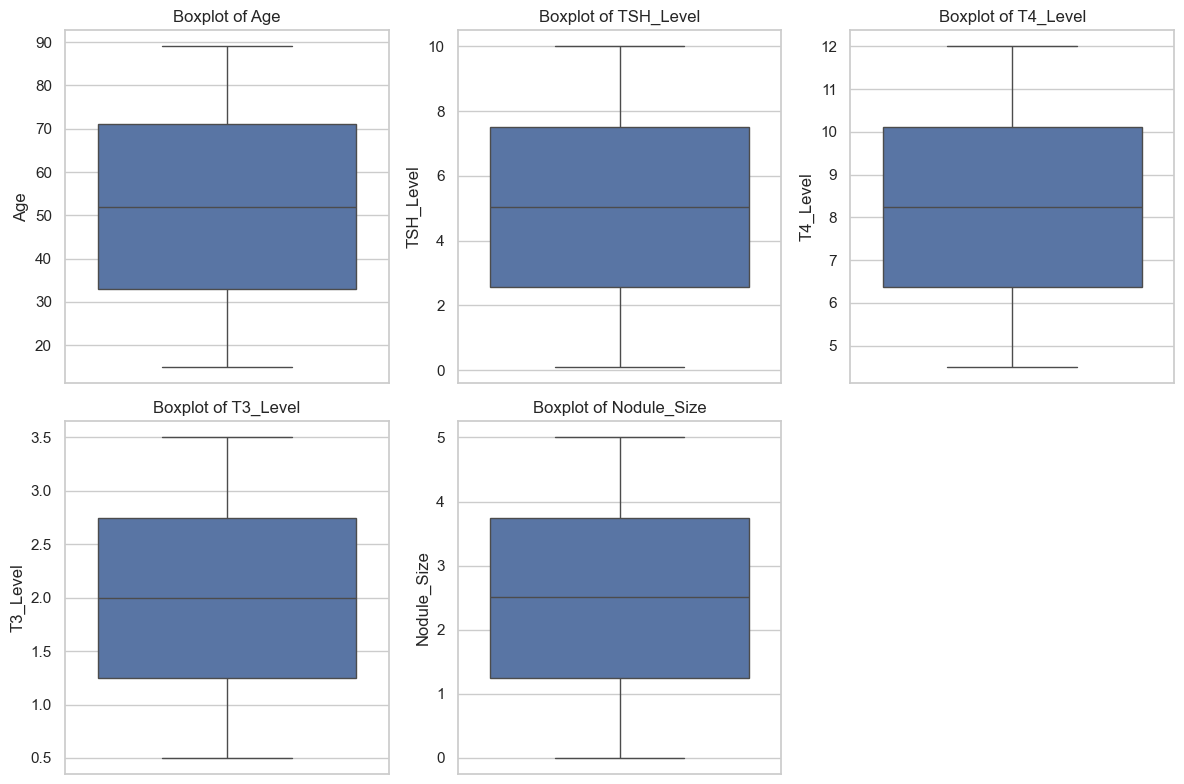

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to plot
numerical_features = ['Age', 'TSH_Level', 'T4_Level', 'T3_Level', 'Nodule_Size']

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each feature
    sns.boxplot(y=train_df[feature])  # Boxplot for the numerical feature on the y-axis
    plt.title(f'Boxplot of {feature}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\sakal\AppData\Local\Temp\ipykernel_25496\1526654036.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df[var], y=prop_df["Proportion"], palette="pastel", ax=axes[i, 1])
C:\Users\sakal\AppData\Local\Temp\ipykernel_25496\1526654036.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df[var], y=prop_df["Proportion"], palette="pastel", ax=axes[i, 1])
C:\Users\sakal\AppData\Local\Temp\ipykernel_25496\1526654036.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df[var], y=prop_df["Proportion"], palette="pastel"

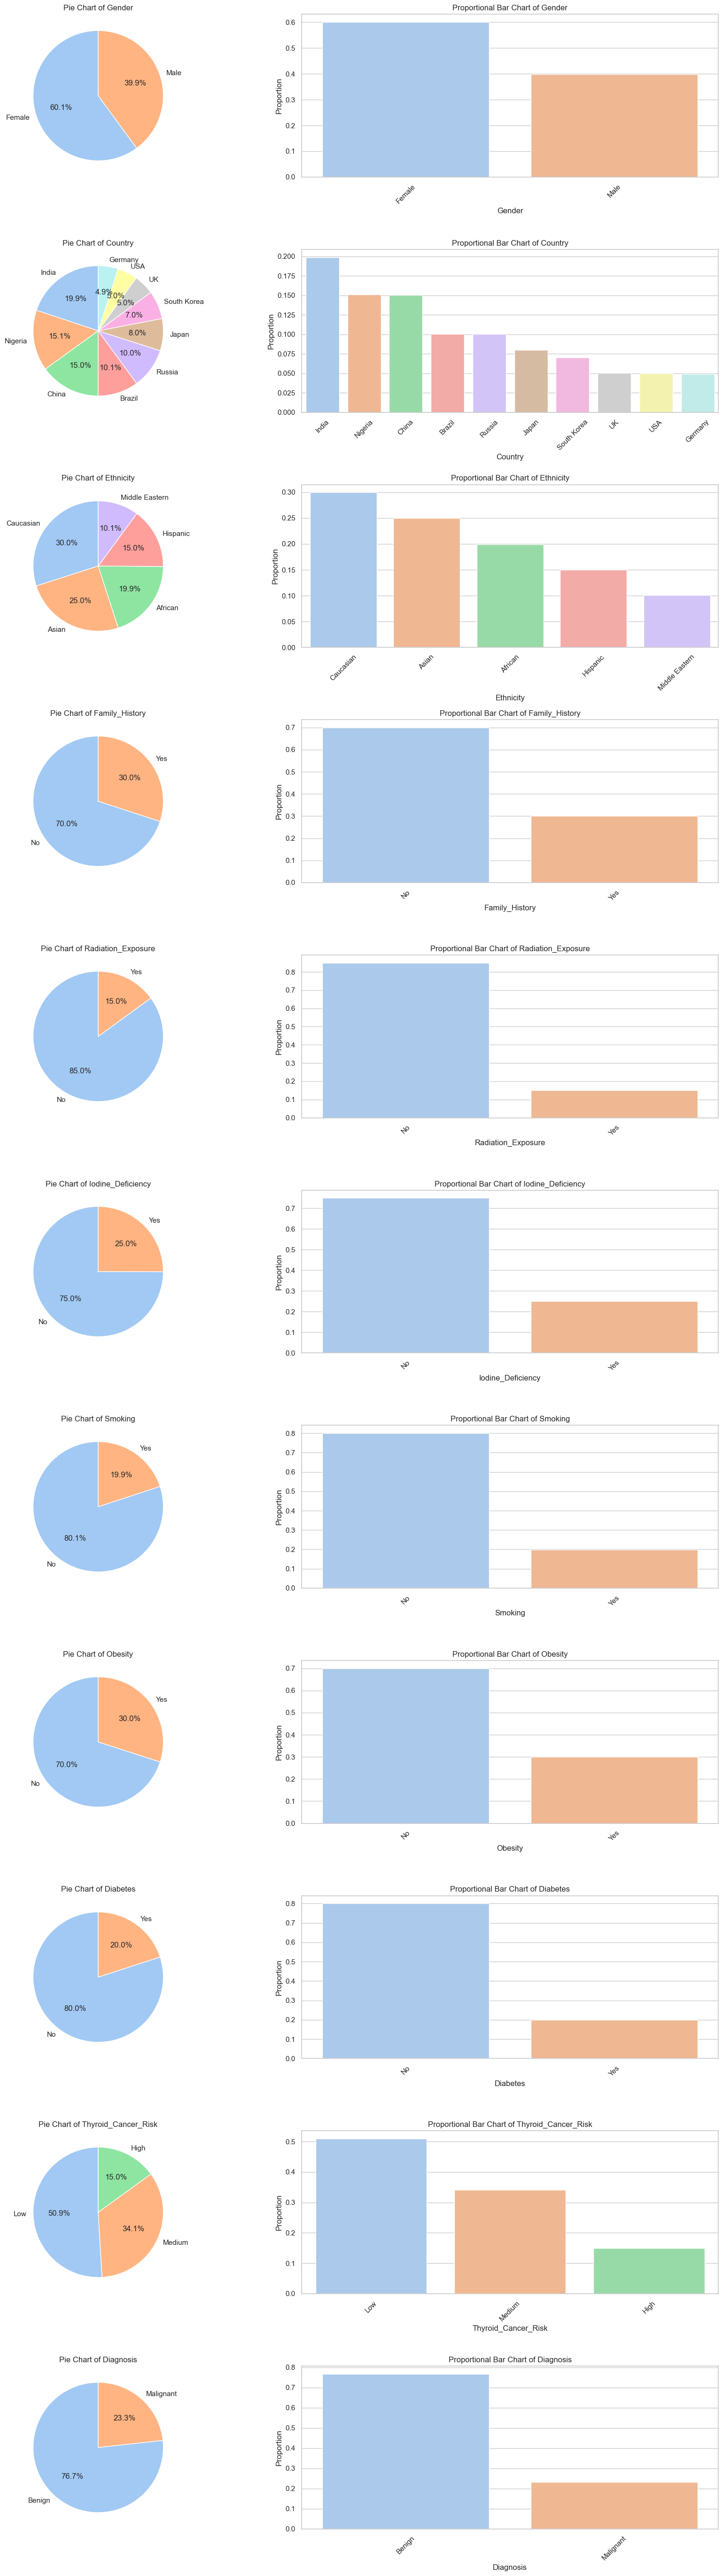

In [25]:
# Identify categorical variables
cat_vars = train_df.select_dtypes(include=["object", "category"]).columns

# Ensure there are categorical variables to plot
if len(cat_vars) > 0:
    fig, axes = plt.subplots(len(cat_vars), 2, figsize=(18, 5 * len(cat_vars)))

    for i, var in enumerate(cat_vars):
        # Compute proportions (excluding NaN values)
        proportions = train_df[var].value_counts(normalize=True, dropna=True)

        # Pie Chart
        axes[i, 0].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
        axes[i, 0].set_title(f"Pie Chart of {var}")

        # Convert proportions to DataFrame for bar plot
        prop_df = proportions.reset_index()
        prop_df.columns = [var, "Proportion"]

        # Proportional Bar Chart
        sns.barplot(x=prop_df[var], y=prop_df["Proportion"], palette="pastel", ax=axes[i, 1])
        axes[i, 1].set_title(f"Proportional Bar Chart of {var}")
        axes[i, 1].set_ylabel("Proportion")
        axes[i, 1].set_xlabel(var)
        axes[i, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

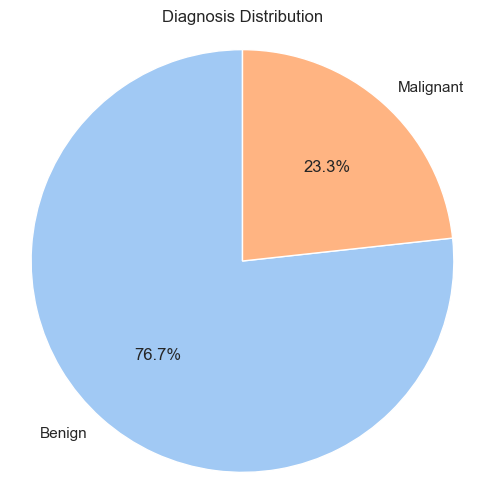

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot pie chart of Diagnosis distribution
response_var = 'Diagnosis'
diagnosis_counts = train_df[response_var].value_counts(normalize=True, dropna=True)

labels = diagnosis_counts.index
sizes = diagnosis_counts.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Diagnosis Distribution")
plt.axis('equal')  # Equal aspect ratio makes the pie chart round

# Save the figure
plt.savefig("diagnosis_pie_chart.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



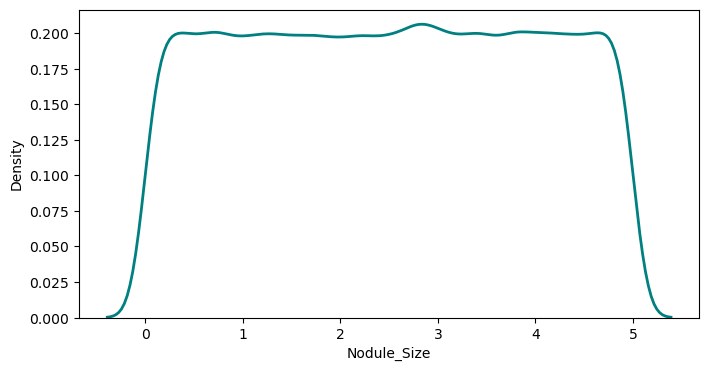

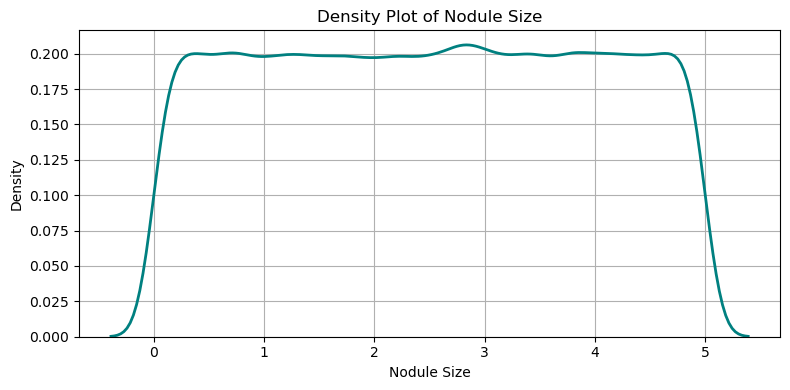

In [29]:
# KDE plot for 'nodule_size' with line only
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=train_df,
    x='Nodule_Size',
    fill=False,
    linewidth=2,
    color='teal'
)

# KDE plot for 'Nodule_Size' with line only
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=train_df,
    x='Nodule_Size',
    fill=False,
    linewidth=2,
    color='teal'
)
plt.title('Density Plot of Nodule Size')
plt.xlabel('Nodule Size')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()

# Save the plot BEFORE showing it
plt.savefig('nodule_size.png', dpi=300)

# Now show the plot
plt.show()


In [27]:
# Calculate percentage of observations where nodule_size < 1
percentage_below_1 = (train_df['Nodule_Size'] > 1).mean() * 100
print(f"Percentage of observations where nodule size > 1: {percentage_below_1:.2f}%")


Percentage of observations where nodule size > 1: 79.86%


In [29]:
# Create a crosstab (counts of Diagnosis by Gender)
crosstab = pd.crosstab(train_df['Gender'], train_df['Diagnosis'], normalize='index') * 100
print(crosstab)

Diagnosis     Benign  Malignant
Gender                         
Female     76.626846  23.373154
Male       76.882773  23.117227


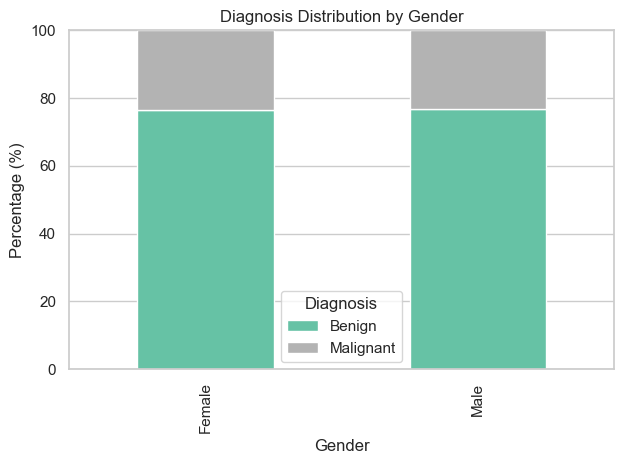

In [31]:
# Plotting
crosstab.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and title
plt.title('Diagnosis Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Diagnosis')
plt.ylim(0, 100)

# Save the plot
plt.tight_layout()
plt.savefig('gender_vs_diagnosis_stacked_bar.png', dpi=300)

# Show the plot
plt.show()


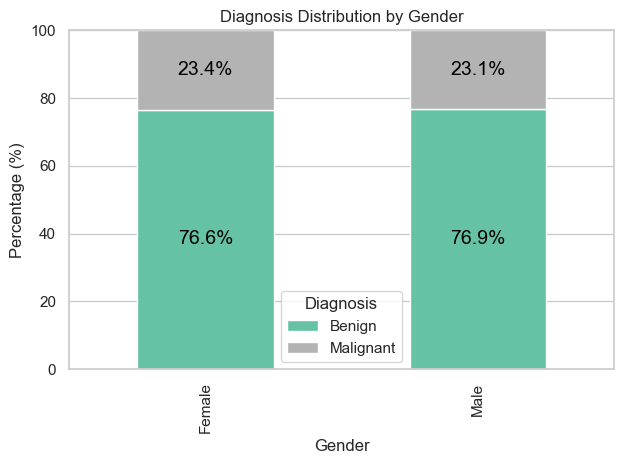

In [33]:

# Plotting
ax = crosstab.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and title
plt.title('Diagnosis Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Diagnosis')
plt.ylim(0, 100)

# Annotate each bar with the respective percentage values
for p in ax.patches:
    height = p.get_height()  # get the height of each patch (bar)
    width = p.get_width()  # get the width
    x = p.get_x() + width / 2  # get the x position to place the label
    y = p.get_y() + height / 2  # get the y position to place the label
    
    # Format the label as a percentage and adjust color and font size
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=14, color='black')

# Save the plot
plt.tight_layout()
plt.savefig('gender_vs_diagnosis_stacked_bar.png', dpi=300)

# Show the plot
plt.show()


C:\Users\sakal\AppData\Local\Temp\ipykernel_25496\771214711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


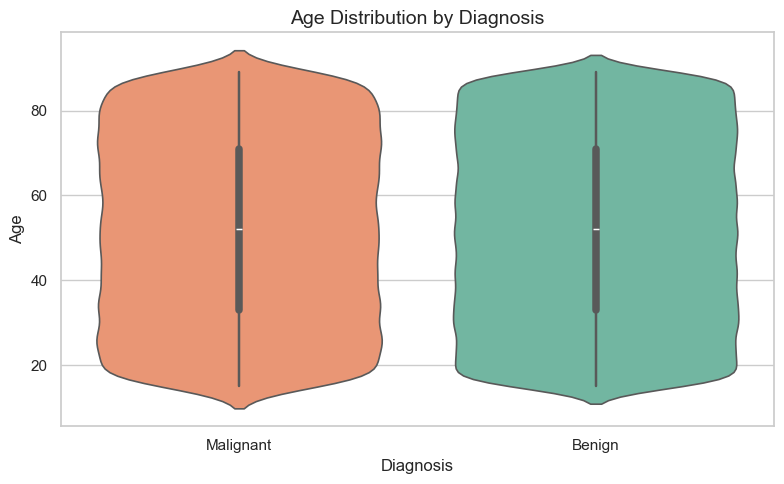

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Set your favorite theme
sns.set(style="whitegrid")

# Custom color palette for the two diagnosis categories
# Adjust the hex colors if you want to match a theme
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=train_df,
    x='Diagnosis',
    y='Age',
    palette=custom_palette,
    inner='box',  # Shows a small boxplot inside each violin
    linewidth=1.2
)

# Title and axis labels
plt.title('Age Distribution by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis')
plt.ylabel('Age')

# Optional: Save the figure
plt.tight_layout()
plt.savefig('violinplot_age_vs_diagnosis.png', dpi=300)

# Display the plot
plt.show()


C:\Users\sakal\AppData\Local\Temp\ipykernel_25496\1824635495.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


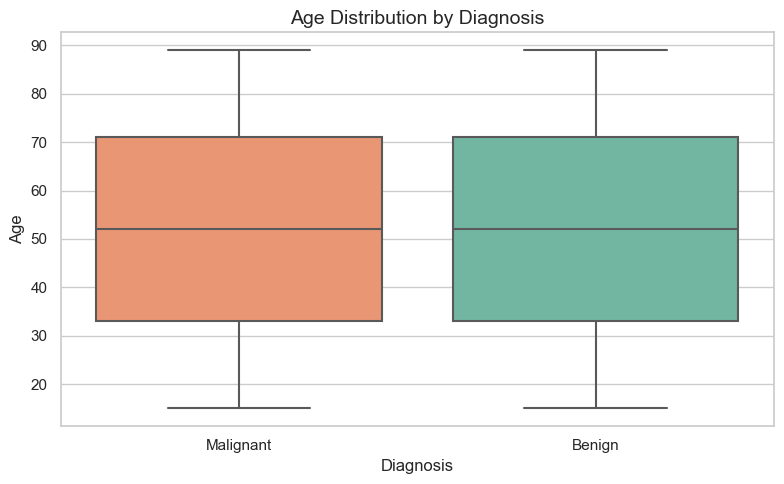

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Use the same custom color palette
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=train_df,
    x='Diagnosis',
    y='Age',
    palette=custom_palette,
    linewidth=1.5
)

# Title and axis labels
plt.title('Age Distribution by Diagnosis', fontsize=14)
plt.xlabel('Diagnosis')
plt.ylabel('Age')

# Save and show
plt.tight_layout()
plt.savefig('boxplot_age_vs_diagnosis.png', dpi=300)
plt.show()


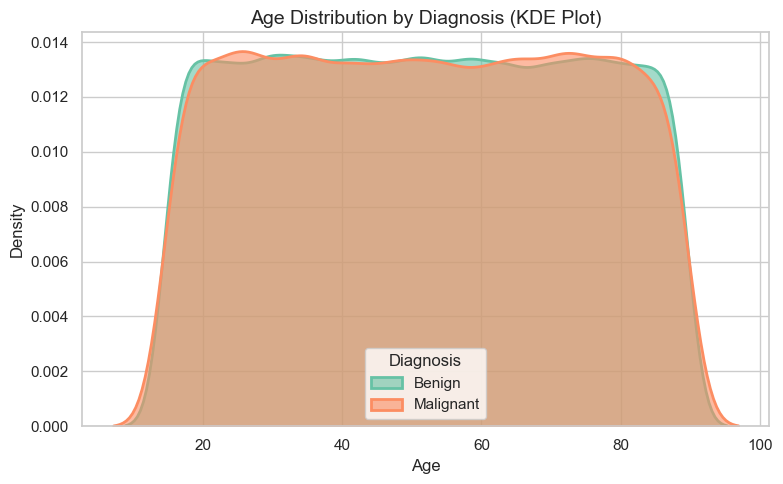

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Define the color palette (same as before)
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Benign'],
    x='Age',
    fill=True,
    label='Benign',
    color=custom_palette['Benign'],
    linewidth=2,
    alpha=0.6
)
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Malignant'],
    x='Age',
    fill=True,
    label='Malignant',
    color=custom_palette['Malignant'],
    linewidth=2,
    alpha=0.6
)

# Add titles and labels
plt.title('Age Distribution by Diagnosis (KDE Plot)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Diagnosis')

# Save and show
plt.tight_layout()
plt.savefig('kdeplot_age_vs_diagnosis.png', dpi=300)
plt.show()


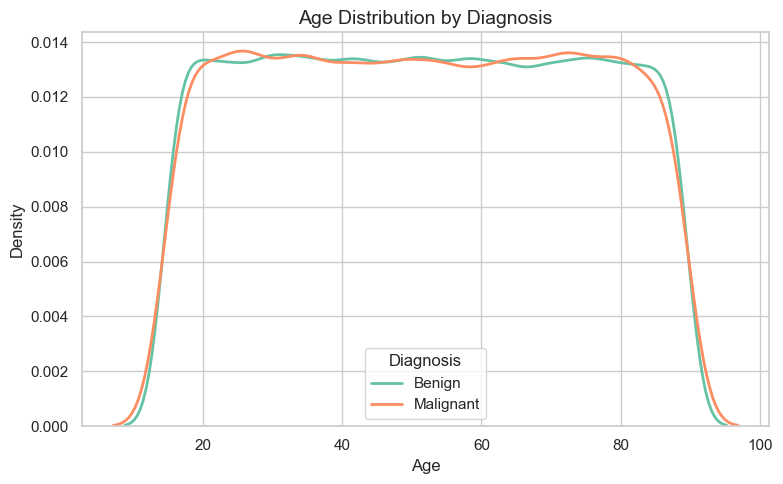

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Color palette
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the KDE plot with lines only
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Benign'],
    x='Age',
    label='Benign',
    color=custom_palette['Benign'],
    linewidth=2
)
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Malignant'],
    x='Age',
    label='Malignant',
    color=custom_palette['Malignant'],
    linewidth=2
)

# Title and labels
plt.title('Age Distribution by Diagnosis', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Diagnosis')

# Save and show
plt.tight_layout()
plt.savefig('kdeplot_age_vs_diagnosis_lines_only.png', dpi=300)
plt.show()


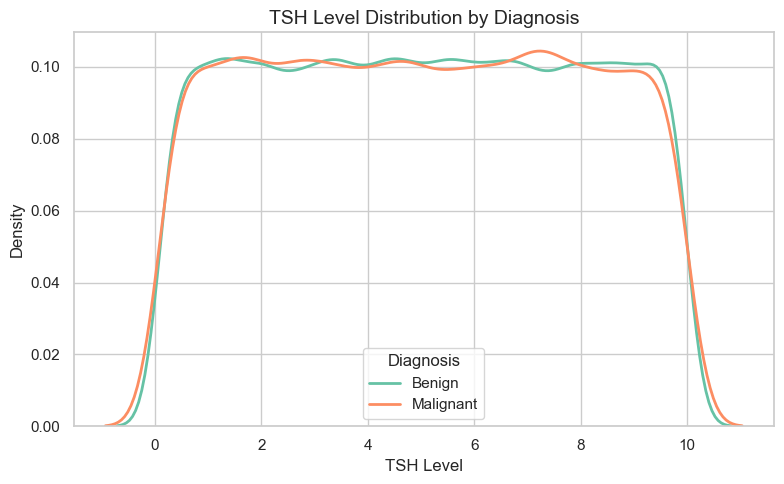

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Color palette
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the KDE plot with lines only
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Benign'],
    x='TSH_Level',
    label='Benign',
    color=custom_palette['Benign'],
    linewidth=2
)
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Malignant'],
    x='TSH_Level',
    label='Malignant',
    color=custom_palette['Malignant'],
    linewidth=2
)

# Title and labels
plt.title('TSH Level Distribution by Diagnosis', fontsize=14)
plt.xlabel('TSH Level')
plt.ylabel('Density')
plt.legend(title='Diagnosis')

# Save and show
plt.tight_layout()
plt.savefig('kdeplot_tsh_vs_diagnosis_lines_only.png', dpi=300)
plt.show()


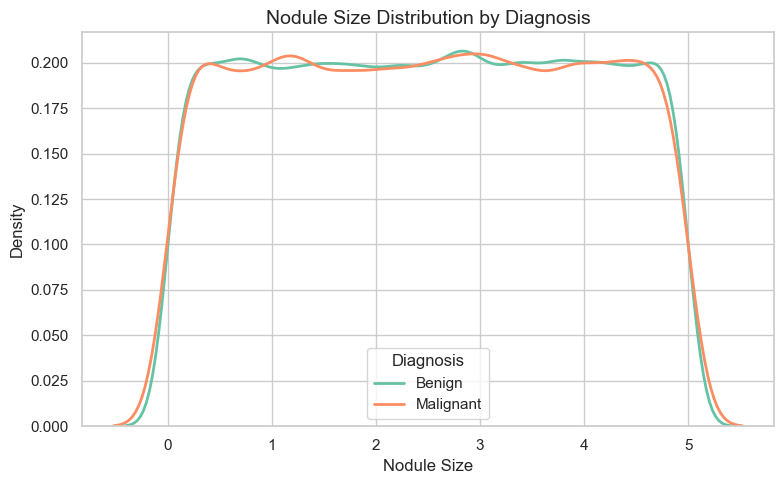

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set(style="whitegrid")

# Color palette
custom_palette = {"Benign": "#66c2a5", "Malignant": "#fc8d62"}

# Create the KDE plot with lines only
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Benign'],
    x='Nodule_Size',
    label='Benign',
    color=custom_palette['Benign'],
    linewidth=2
)
sns.kdeplot(
    data=train_df[train_df['Diagnosis'] == 'Malignant'],
    x='Nodule_Size',
    label='Malignant',
    color=custom_palette['Malignant'],
    linewidth=2
)

# Title and labels
plt.title('Nodule Size Distribution by Diagnosis', fontsize=14)
plt.xlabel('Nodule Size')
plt.ylabel('Density')
plt.legend(title='Diagnosis')

# Save and show
plt.tight_layout()
plt.savefig('kdeplot_nodule_vs_diagnosis_lines_only.png', dpi=300)
plt.show()

In [43]:
# Create a crosstab (counts of Diagnosis by Fam Hist.)
crosstab = pd.crosstab(train_df['Family_History'], train_df['Diagnosis'], normalize='index') * 100
print(crosstab)

Diagnosis          Benign  Malignant
Family_History                      
No              80.603358  19.396642
Yes             67.698933  32.301067


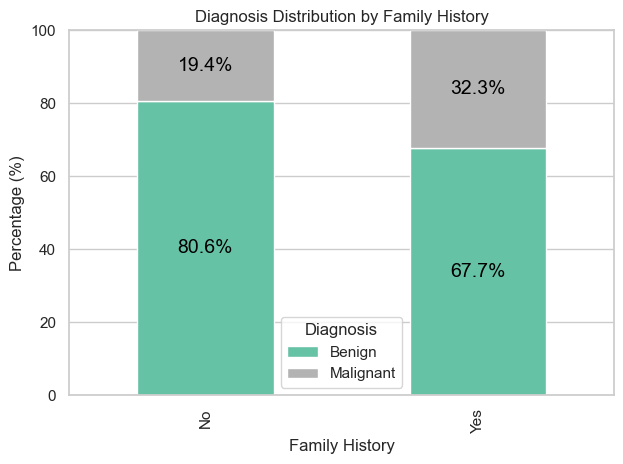

In [45]:
# Plotting
ax = crosstab.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and title
plt.title('Diagnosis Distribution by Family History')
plt.xlabel('Family History')
plt.ylabel('Percentage (%)')
plt.legend(title='Diagnosis')
plt.ylim(0, 100)

# Annotate each bar with the respective percentage values
for p in ax.patches:
    height = p.get_height()  # get the height of each patch (bar)
    width = p.get_width()  # get the width
    x = p.get_x() + width / 2  # get the x position to place the label
    y = p.get_y() + height / 2  # get the y position to place the label
    
    # Format the label as a percentage and adjust color and font size
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=14, color='black')

# Save the plot
plt.tight_layout()
plt.savefig('fam_hist_vs_diagnosis_stacked_bar.png', dpi=300)

# Show the plot
plt.show()

In [47]:
# Create a crosstab (counts of Diagnosis by Radiation)
crosstab = pd.crosstab(train_df['Radiation_Exposure'], train_df['Diagnosis'], normalize='index') * 100
print(crosstab)

Diagnosis              Benign  Malignant
Radiation_Exposure                      
No                  78.299885  21.700115
Yes                 67.819472  32.180528


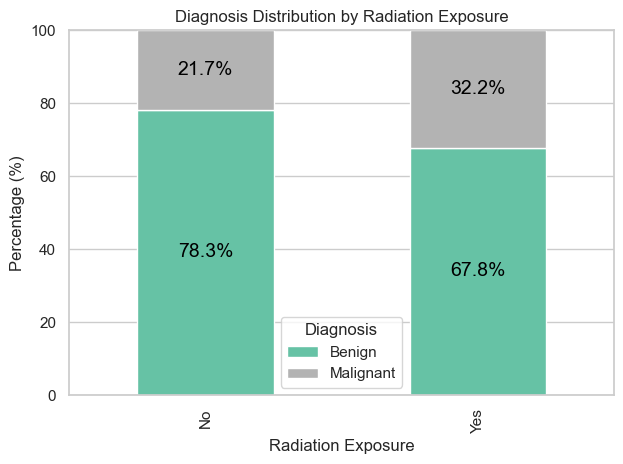

In [49]:
# Plotting
ax = crosstab.plot(kind='bar', stacked=True, colormap='Set2')

# Add labels and title
plt.title('Diagnosis Distribution by Radiation Exposure')
plt.xlabel('Radiation Exposure')
plt.ylabel('Percentage (%)')
plt.legend(title='Diagnosis')
plt.ylim(0, 100)

# Annotate each bar with the respective percentage values
for p in ax.patches:
    height = p.get_height()  # get the height of each patch (bar)
    width = p.get_width()  # get the width
    x = p.get_x() + width / 2  # get the x position to place the label
    y = p.get_y() + height / 2  # get the y position to place the label
    
    # Format the label as a percentage and adjust color and font size
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=14, color='black')

# Save the plot
plt.tight_layout()
plt.savefig('rad_expose_vs_diagnosis_stacked_bar.png', dpi=300)

# Show the plot
plt.show()

In [ ]:

import numpy as np

# Detect outliers using IQR
def detect_outliers_iqr(train_df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical variable
for var in num_vars:
    outliers = detect_outliers_iqr(train_df, var)
    print(f"Outliers in {var}:")
    print(outliers[[var]])
    print("\n")



In [ ]:
# Identify numerical variables
num_vars = train_df.select_dtypes(include=["number"]).columns

# Set up subplots
fig, axes = plt.subplots(len(num_vars), 1, figsize=(10, 5 * len(num_vars)))

# Plot each numerical variable against Diagnosis with median annotation
for i, var in enumerate(num_vars):
    ax = axes[i]
    sns.boxplot(x="Diagnosis", y=var, data=train_df, ax=ax, palette="pastel")
    ax.set_title(f"Boxplot of {var} by Diagnosis")
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(var)

    # Annotate medians
    medians = train_df.groupby("Diagnosis")[var].median()
    for j, diagnosis in enumerate(medians.index):
        median_val = medians[diagnosis]
        ax.text(j, median_val, f'{median_val:.2f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Identify categorical variables
cat_vars = train_df.select_dtypes(include=["object", "category"]).columns

# Set up subplots
fig, axes = plt.subplots(len(cat_vars), 1, figsize=(10, 5 * len(cat_vars)))
for i, var in enumerate(cat_vars):
    # Calculate proportions
    proportions = train_df.groupby([var, "Diagnosis"]).size().unstack().fillna(0)
    proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Convert to proportions

    # Plot using Matplotlib bar plot
    proportions.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("pastel"))
    axes[i].set_title(f"Proportional Bar Chart of {var} by Diagnosis")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Proportion")

plt.tight_layout()
plt.show()
plt.savefig('/path/to/save/plot_example.png')

In [ ]:
# Identify categorical variables
cat_vars = train_df.select_dtypes(include=["object", "category"]).columns

# Set up subplots
fig, axes = plt.subplots(len(cat_vars), 1, figsize=(10, 5 * len(cat_vars)))

# Plot each categorical variable against Diagnosis
for i, var in enumerate(cat_vars):
    # Calculate proportions by Diagnosis
    proportions = train_df.groupby([var, "Diagnosis"]).size().unstack().fillna(0)
    proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Convert counts to proportions
    
    # Plot a bar chart for proportions
    # Manually apply color palette
    proportions.plot(kind='bar', ax=axes[i], color=sns.color_palette("pastel"), width=0.8)
    axes[i].set_title(f"Proportional Bar Chart of {var} by Diagnosis")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Diagnosis")

plt.tight_layout()
plt.show()

In [ ]:
# Plot Countplot of Country by Ethnicity
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Ethnicity', data=train_df, palette='pastel')

# Add labels and title
plt.title('Country by Ethnicity Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Plot Countplot of Country by Ethnicity
plt.figure(figsize=(12, 6))
sns.countplot(x='Ethnicity', hue='Country', data=train_df, palette='pastel')

# Add labels and title
plt.title('Country by Ethnicity Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical features
numeric_vars = ['Age', 'TSH_Level', 'T4_Level', 'T3_Level', 'Nodule_Size']  # List of numeric variables in your dataset
corr_matrix = train_df[numeric_vars].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [ ]:
numeric_data = train_df.select_dtypes(include=['number'])

# Perform Shapiro-Wilk test for normality on each numeric column
for column in numeric_data.columns:
    stat, p_value = stats.shapiro(numeric_data[column])
    print(f"Shapiro-Wilk test for {column} - Statistic: {stat}, P-value: {p_value}")
    
    # Interpret the result
    if p_value > 0.05:
        print(f"{column}: Data is likely normally distributed (fail to reject H0).")
    else:
        print(f"{column}: Data is likely not normally distributed (reject H0).")

In [ ]:
from scipy.stats import mannwhitneyu

# Create a dictionary to store p-values
p_values = {}

# Loop through the numerical features and perform Mann-Whitney U test for each
for feature in ['Age', 'TSH_Level', 'T4_Level', 'T3_Level', 'Nodule_Size']:
    # Split the data based on Diagnosis (Benign: 0, Malignant: 1)
    benign_data = train_df[train_df['Diagnosis'] == 'Benign'][feature]
    malignant_data = train_df[train_df['Diagnosis'] == 'Malignant'][feature]
    
    # Perform the Mann-Whitney U Test
    stat, p_value = mannwhitneyu(benign_data, malignant_data, alternative='two-sided')  # Default is two-sided
    
    # Store the p-value
    p_values[feature] = p_value

# Display the p-values
for feature, p_value in p_values.items():
    print(f"{feature}: p-value = {p_value:.4f}")


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables (excluding Diagnosis)
cat_vars = ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 
            'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']

# Create a dictionary to store p-values
p_values_cat = {}

# Loop through each categorical variable and perform Chi-Square Test
for var in cat_vars:
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(train_df[var], train_df['Diagnosis'])
    
    # Perform Chi-Square Test 
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the p-value
    p_values_cat[var] = p_value

# Display the p-values
for var, p_value in p_values_cat.items():
    print(f"{var}: p-value = {p_value:.4f}")